# Link Prediction

In [ ]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
sns.set(style='darkgrid')

In [ ]:
# Load data

edge_df = pd.read_csv("data/edges.csv", delimiter=",")
node_df = pd.read_csv("data/nodes.csv", delimiter=",")


NameError: name 'pd' is not defined

In [ ]:
# Turn into networkx graph

G = nx.from_pandas_edgelist(edge_df, source="# source", target=" target", create_using=nx.Graph())

nx.number_of_edges(G)


NameError: name 'nx' is not defined

In [ ]:
largest_cc = max(nx.connected_components(G), key=len)
LG = G.subgraph(largest_cc)

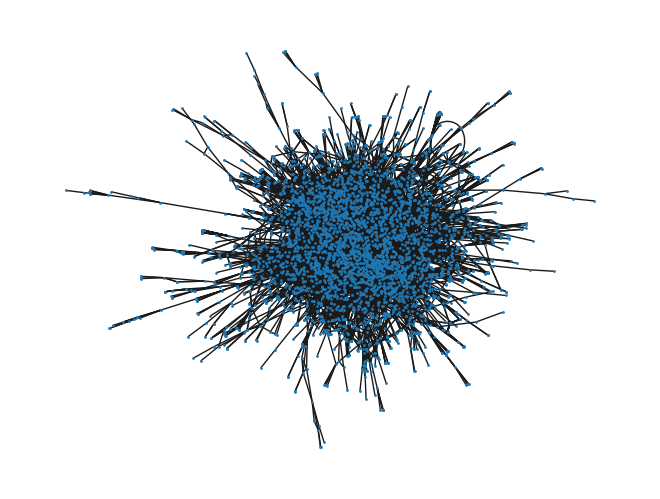

In [ ]:
nx.draw(LG, node_size=1)

### Preferential Attachment

In [ ]:
%%script echo Skipping!
# We define a function called pref_attachment
def pref_attachment(graph, n):
    scores = []
    # We use the preferential attachment documentation from networkx
    linkpred_pa = list(nx.preferential_attachment(G))
    # Now we sort in decreasing score
    linkpred_pa.sort(key = lambda tup: tup[2], reverse = True)
    # We make a for-loop for the link predictions between the nodes
    for u, v, p in linkpred_pa[:n]:
        # We normalize the scores using the G.number_of_nodes
        score = p * (1 / (2 * G.number_of_nodes()))
        scores.append(score)
        print(f"({u}, {v}) -> {score:.3f}")

    plt.title("Preferential attachment")
    plt.xlabel("Score")
    plt.ylabel("Number of nodes")
    plt.hist(scores, bins=50)
    plt.show()
    
# We run the function
pref_attachment(G, G.number_of_nodes())

Skipping!


The result we get is the score of possible edges between nodes that don't have that specific edge between them. SO the bigger the degree of a certain node is, the higher the possibility of an edge appearing between those two nodes. 

### Adamic Adar

In [ ]:
%%script echo Skipping!
ef adamic_adar(graph, top_n):
    scores = []
    linkpred_aa = list(nx.adamic_adar_index(graph))
    # Sort in decreasing score
    linkpred_aa.sort(key = lambda tup: tup[2], reverse = True)
    for u, v, p in linkpred_aa[:top_n]:
        scores.append(p)
        print(f"({u}, {v}) -> {p:.8f}")


    plt.title("Adamic-Adar", loc = 'left')
    plt.xlabel("Score")
    plt.ylabel("Number of nodes")
    plt.hist(scores, bins=50)
    plt.show()

adamic_adar(G, G.number_of_nodes())

Skipping!


In Adamic-Adar (AA) we say that common neighbors are important, but the hubs contribute less to the link prediction than two common neighbors with no other links, because the hubs do not have enough bandwidth to make the introduction
The formula says that, for each common neighbor, instead of counting one – as we do in Common Neighbor when we look at the intersection –, we count one over the common neighbor’s degree (log-transformed).

In [ ]:
class link_pred:
    def __init__(self, graph, formula: "pref", n: int, plot= False, save = False):
        self._graph = graph
        self._scores = []
        self._link_score = []
        self._form = formula.lower()
        self._top_n = n
        self._plot = plot
        self._save = save

        if self._form == "adamic":
            self._adamic_adar()
        else:
            self._pref_attachment()


    def _adamic_adar(self):
        linkpred_aa = list(nx.adamic_adar_index(self._graph))
        # Sort in decreasing score
        linkpred_aa.sort(key = lambda tup: tup[2], reverse = True)
        for u, v, p in linkpred_aa[:self._top_n]:
            self._scores.append(p)
            self._link_score.append((u,v,p))

        if self._plot:
            self._histogram()
     
        return self._link_score

    def _pref_attachment(self):
        # We use the preferential attachment documentation from networkx
        linkpred_pa = list(nx.preferential_attachment(self._graph))
        # Now we sort in decreasing score
        linkpred_pa.sort(key = lambda tup: tup[2], reverse = True)
        # We make a for-loop for the link predictions between the nodes
        for u, v, p in linkpred_pa[:self._top_n]:
            # We normalize the scores using the G.number_of_nodes
            score = p * (1 / (2 * self._graph.number_of_nodes()))
            self._link_score.append((u,v,score))
            self._scores.append(score)
        if self._plot:
            self._histogram()

        return self._link_score
    
    def _histogram(self):
        if self._form == "adamic":
            plt.title("Adamic-Adar")
        elif self._form == "pref":
            plt.title("Preferential attachment")
        plt.xlabel("Score")
        plt.ylabel("Number of nodes")
        plt.hist(self._scores, 50)
        plt.show()
        if self._save:
            plt.savefig(f"figures/{self._form.lower()}histogram.png")
            print(f"Saved to: figures/{self._form.lower()}histogram.png !")

    def show(self):
        return self._link_score
    
    def __str__(self):
        s = ""
        for u, v, p in self._link_score:
            s += f"({u}, {v}) -> {p:.8f}\n"
        return s

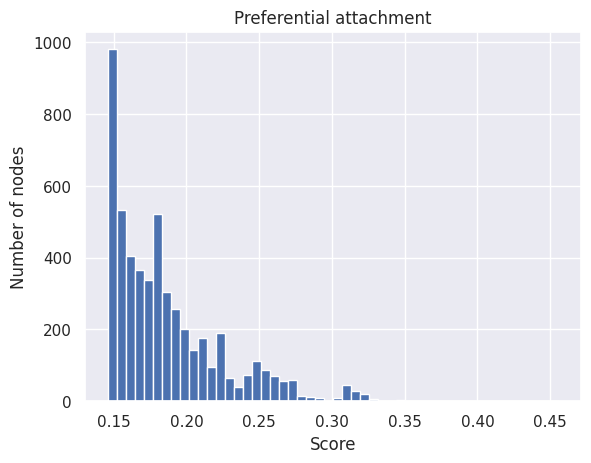

In [ ]:
link_pred(graph = G, formula = "pref", n = G.number_of_nodes(), plot = True)

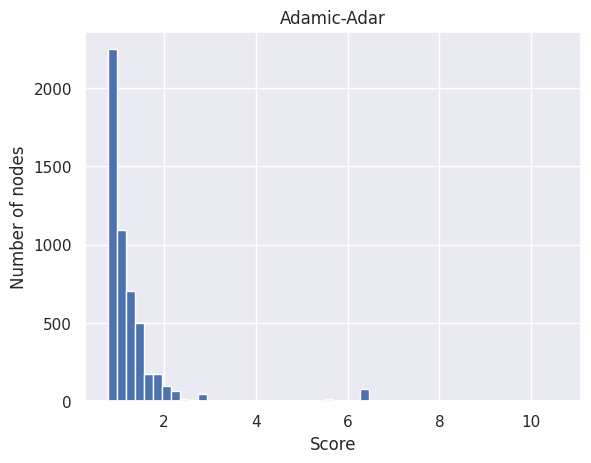

In [ ]:
link_pred(graph = G, formula = "adamic", n = G.number_of_nodes(), plot = True)

In [ ]:
link_pred(graph = G, formula = "pref", n = G.number_of_nodes()).show()

[(15244, 21012, 0.45583746661579555),
 (15244, 21281, 0.44458222052651664),
 (12365, 15244, 0.4333269744372377),
 (15244, 22691, 0.4333269744372377),
 (6610, 15244, 0.38267836703548264),
 (9785, 15244, 0.38267836703548264),
 (6512, 21012, 0.3785768790537963),
 (15244, 21508, 0.3770507439908432),
 (15244, 17655, 0.3714231209462038),
 (6512, 21281, 0.36922930179320873),
 (2741, 15244, 0.3657954979015643),
 (6512, 12365, 0.3598817245326212),
 (6512, 22691, 0.3598817245326212),
 (15244, 19423, 0.35454025181228543),
 (15003, 15244, 0.34891262876764595),
 (13801, 21012, 0.3476726440289966),
 (13929, 21012, 0.3476726440289966),
 (13801, 21281, 0.33908813429988555),
 (13929, 21281, 0.33908813429988555),
 (14807, 15244, 0.33765738267836704),
 (10350, 21012, 0.3322205265165967),
 (18866, 21281, 0.33155284242655475),
 (4511, 22691, 0.33050362457077453),
 (12365, 13801, 0.33050362457077453),
 (12365, 13929, 0.33050362457077453),
 (13801, 22691, 0.33050362457077453),
 (13929, 22691, 0.3305036245707

In [ ]:
# from main
%%script echo Skipping!
# We define a function called pref_attachment
def pref_attachment(graph, n):
    # We use the preferential attachment documentation from networkx
    linkpred_pa = list(nx.preferential_attachment(G))
    # Now we sort in decreasing score
    linkpred_pa.sort(key = lambda tup: tup[2], reverse = True)
    # We make a for-loop for the link predictions between the nodes
    for u, v, p in linkpred_pa[:n]:
        # We normalize the scores using the G.number_of_nodes
        score = p * (1 / (2 * G.number_of_nodes()))
        print(f"({u}, {v}) -> {score:.3f}")

    plt.hist(score, bins=50)
    plt.show()
    
# We run the function
pref_attachment(G, 50)

The result we get is the score of possible edges between nodes that don't have that specific edge between them. SO the bigger the degree of a certain node is, the higher the possibility of an edge appearing between those two nodes. 


In Adamic-Adar (AA) we say that common neighbors are important, but the hubs contribute less to the link prediction than two common neighbors with no other links, because the hubs do not have enough bandwidth to make the introduction
The formula says that, for each common neighbor, instead of counting one – as we do in Common Neighbor when we look at the intersection –, we count one over the common neighbor’s degree (log-transformed).

In [ ]:
# from main
%%script echo Skipping!
def adamic_adar(graph, top_n):
    linkpred_aa = list(nx.adamic_adar_index(graph))
    # Sort in decreasing score
    linkpred_aa.sort(key = lambda tup: tup[2], reverse = True)
    for u, v, p in linkpred_aa[:top_n]:
        print(f"({u}, {v}) -> {p:.8f}")

    plt.hist(p, bins=50)
    plt.show()

adamic_adar(G, 5)